<strong><font size="5">End To End Machine Learning pipeline with Feature selection and Hyperparameter tuning</font></strong><br><br>


<strong><font size="3">Introduction</strong></font><br><br>

An end to end machine learning pipeline which takes path to a csv file as the input and returns a dataframe with best features.<br><br>
Along with feature selection the pipeline also provides features like:<br><br>
<font color='blue'>1)Preprocessing the entire dataset<br><br>
2)Balance the Dataset.<br><br>
3)Split into training data and testing data.<br><br>
4)Normalizing the Data.<br><br>
5)Dealing N/A values.<br><br>
6)Train models(Random Forest and logistic Regression) on the dataset with the best selected features.<br><br>
7)Various Data visualization tasks</font><br><br><br><br>
    
<strong><font size="3">Instructions:</font><br><br><br><br></strong>


<font size="2">Note:Before running code install required packages mentioned in requirements.txt file.This can be done by running the command <strong>"pip install -r requirements.txt"</strong><font size="2"><br><br><br>


Pipeline takes following parameters:<br><br><br>


1)<b>label_name</b>:str Complusory
 

<strong>------------------------------------------------------------------------------------------------</strong><br><br><br>
 
2)<b>algo</b>:str

Algorithm to use to train models.(Current available options 1.Random Forest;2.Logistic Regression)


<strong>-----------------------------------------------------------------------------------------------------</strong><br><br><br>


3)<b>scoring</b> :str 
  
metric to maximize


<strong>----------------------------------------------------------------------------------------------------</strong><br><br><br>


4)<b>categorical_cols</b>:List(str) default:[]
  
List of Columns to convert to Ordinal values


<strong>-----------------------------------------------------------------------------------------------------</strong><br><br><br>



5)<b>want_preprocess</b>:bool default:True
 
Whether to avail preprocessing provided by the pipeline


<strong>----------------------------------------------------------------------------------------------------</strong><br><br><br>



6)<b>first iter</b>:bool default:False

Train base models

<strong><font size="2" color='red'>Note:Only set true while running code for first time or using a previously unused
    
algorithm(set by algo parameter) and scoring for the first time.</strong></font>
<break>
<break>
<break>

<strong>---------------------------------------------------------------------------------------------------------</strong><br><br><br>    
    
7)<b>want_train</b>:bool default:False

train models on transformed dataset

<strong><font size="2" color='red'>Note:Setting this to true will trains models and stores them in your current directory</strong></font>

Can access the estimator trained on best features through the varialbe self.best_estimator

    
    
<strong>---------------------------------------------------------------------------------------------------------</strong><br><br><br>


8)<b>recheck</b>:bool default:False
<p>
recompute best features

<strong><font size="2" color='red'>Note:Setting this to true will train models and stores them in your current directory</strong></font><br><br>
    
    
<font size="2" color='green'>For More Details on parameters refer to comments in the Full_Pipeline</font>


 
    

<font size='5'><strong>CODE</font></strong><br>

In [1]:
import import_ipynb
from Full_Pipeline import Pipeline
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

importing Jupyter notebook from Full_Pipeline.ipynb


In [3]:
ordi_cols=['gender','ever_married','Residence_type', 'smoking_status']
selector=Pipeline('stroke',algo='Random Forest',scoring='accuracy',categorical_cols=ordi_cols,first_iter=True,recheck=True,want_train=True)
trainingdata,traininglabel=selector.fit_transform('stroke2.csv')
# print(boardgamestrain)

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status',
       'stroke'],
      dtype='object')
Fitting 3 folds for each of 50 candidates, totalling 150 fits
Fitting 3 folds for each of 40 candidates, totalling 120 fits


In [4]:
trainingdata

,avg_glucose_level
0,2.702177
1,2.118093
2,-0.005825
3,1.434752
4,1.498498
...,...
5082,-0.494840
5083,0.419444
5084,-0.511604
5085,1.325788


<font size='5'><strong>Results</font></strong><br><br><br>

<font size='4'><strong>ROC_AUC_CURVE</font></strong><br>

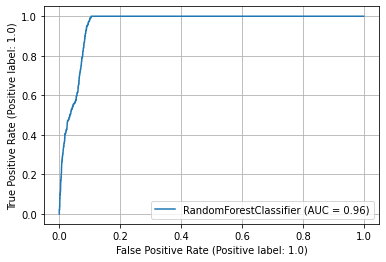

In [5]:
selector.predict_and_plot('plot_roc_curve',trainingdata,traininglabel,selector.best_estimator)
plt.show()

<font size='4'><strong>PREDICTIONS</font></strong><br>

In [6]:
selector.predict_and_plot('predictions',trainingdata,traininglabel,selector.best_estimator)

array([0., 0., 0., ..., 0., 0., 0.])

<font size='4'><strong>ACCURACY_SCORE</font></strong><br>

In [7]:
selector.predict_and_plot('accuracy_score',trainingdata,traininglabel,selector.best_estimator)

0.9514448594456457

<font size='4'><strong>PRECISION_SCORE</font></strong><br>

In [8]:
selector.predict_and_plot('precision_score',trainingdata,traininglabel,selector.best_estimator)

1.0

<font size='4'><strong>RECALL_SCORE</font></strong><br>

In [9]:
selector.predict_and_plot('recall_score',trainingdata,traininglabel,selector.best_estimator)

0.008032128514056224

<font size='4'><strong>ROC_AUC_SCORE</font></strong><br>

In [10]:
selector.predict_and_plot('roc_auc_score',trainingdata,traininglabel,selector.best_estimator)

0.5040160642570282

<font size='4'><strong>CONFUSION MATRIX</font></strong><br>

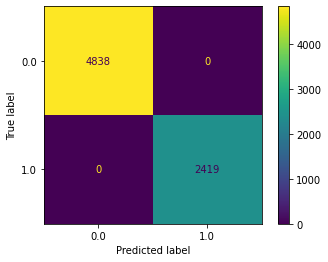

In [46]:
selector.predict_and_plot('confusion_matrix',trainingdata,traininglabel,selector.best_estimator)